In [1]:
# Conv-TasNet Hyperparameter Tuning Notebook
# Author: Graham Pellegrini | UOM Final Year Project

# ============================
# 📦 1. Setup & Imports
# ============================
import os
import torch
import torchaudio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

from torch.utils.data import DataLoader
from torch import nn
from Utils.train import train_eval
from Utils.models import ConvTasNet
from Utils.dataset import DynamicBuckets, BucketSampler
import config



In [2]:
# ============================
# 🧩 2. Configuration
# ============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Dataset and preprocessing parameters
sr = config.SAMPLE_RATE
n_fft = config.N_FFT
hop_length = config.HOP_LENGTH
batch_size = config.BATCH_SIZE
accum_steps = config.ACCUMULATION_STEPS
num_workers = config.NUM_WORKERS
num_buckets = config.NUM_BUCKET

# Datasets
train_dataset = DynamicBuckets(config.DATASET_DIR, "trainset_56spk", sr, n_fft, hop_length, num_buckets)
val_dataset = DynamicBuckets(config.DATASET_DIR, "trainset_28spk", sr, n_fft, hop_length, num_buckets)
train_sampler = BucketSampler(train_dataset.bucket_indices, batch_size=batch_size)
val_sampler = BucketSampler(val_dataset.bucket_indices, batch_size=batch_size)
train_loader = DataLoader(train_dataset, batch_sampler=train_sampler, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_sampler=val_sampler, num_workers=num_workers)


Using device: cuda


Loaded cache file: cache/dynamic/trainset_56spk_buckets.pkl


Loaded cache file: cache/dynamic/trainset_28spk_buckets.pkl


In [ ]:
# ============================
# 🔍 3. Hyperparameter Search Space (Extended)
# ============================
hparam_trials = [
    {
        "name": "T2_Adam_LR1e-3", "enc_dim": 128, "feature_dim": 48,
        "kernel_size": (3, 3), "num_layers": 4, "num_stacks": 2,
        "lr": 1e-3, "optimizer": "adam", "scheduler": True
    },
    {
        "name": "T9_Adam_LR5e-4", "enc_dim": 128, "feature_dim": 48,
        "kernel_size": (3, 3), "num_layers": 4, "num_stacks": 2,
        "lr": 5e-4, "optimizer": "adam", "scheduler": True
    },
    {
        "name": "T10_SGD_LR1e-2", "enc_dim": 128, "feature_dim": 48,
        "kernel_size": (3, 3), "num_layers": 4, "num_stacks": 2,
        "lr": 1e-2, "optimizer": "sgd", "scheduler": False
    },
    {
        "name": "T11_Adam_LR2e-4_NoSched", "enc_dim": 128, "feature_dim": 48,
        "kernel_size": (3, 3), "num_layers": 4, "num_stacks": 2,
        "lr": 2e-4, "optimizer": "adam", "scheduler": False
    }
]

results = []



🎯 Trial 1: {'enc_dim': 64, 'feature_dim': 32, 'kernel_size': (3, 3), 'num_layers': 3, 'num_stacks': 2}


/opt/users/gpel0001/nnc-fyp/.Project/Utils/train.py:41: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


/opt/users/gpel0001/nnc-fyp/.Project/Utils/train.py:80: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch [1/5] - Loss: 0.1380, Val Loss: 0.1040, Val SNR: 3.94 dB
✔ Model saved to Models/Trial_1_ConvTasNet.pth (Best Val Loss: 0.1040)


Epoch [2/5] - Loss: 0.0959, Val Loss: 0.0911, Val SNR: 4.26 dB
✔ Model saved to Models/Trial_1_ConvTasNet.pth (Best Val Loss: 0.0911)


Epoch [3/5] - Loss: 0.0864, Val Loss: 0.0847, Val SNR: 4.44 dB
✔ Model saved to Models/Trial_1_ConvTasNet.pth (Best Val Loss: 0.0847)


Epoch [4/5] - Loss: 0.0850, Val Loss: 0.0805, Val SNR: 4.55 dB
✔ Model saved to Models/Trial_1_ConvTasNet.pth (Best Val Loss: 0.0805)


Epoch [5/5] - Loss: 0.0816, Val Loss: 0.0828, Val SNR: 4.46 dB
--- Training Complete ---
@ Total Training Time: 10688.98 seconds
@ Total Training Time: 178.15 minutes
@ Total Training Time: 2.97 hours


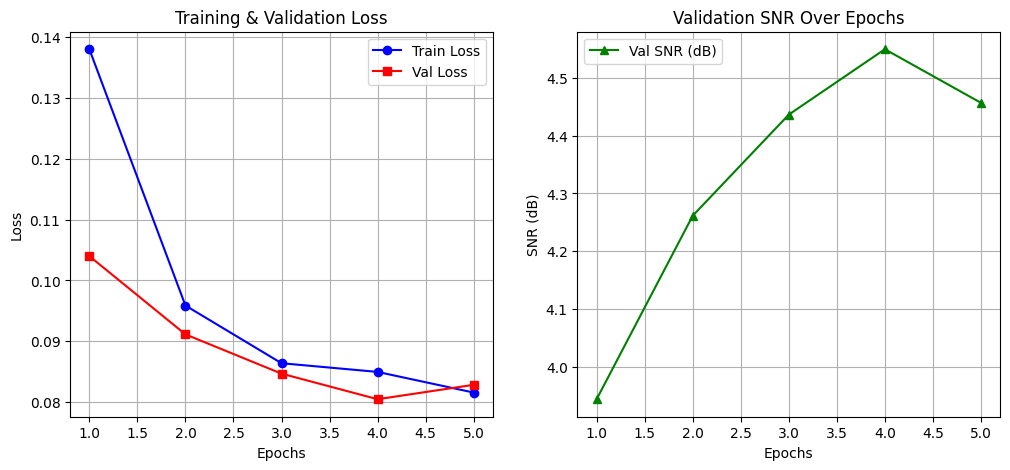


🎯 Trial 2: {'enc_dim': 128, 'feature_dim': 48, 'kernel_size': (3, 3), 'num_layers': 4, 'num_stacks': 2}


Epoch [1/5] - Loss: 0.2156, Val Loss: 0.0992, Val SNR: 4.06 dB
✔ Model saved to Models/Trial_2_ConvTasNet.pth (Best Val Loss: 0.0992)


Epoch [2/5] - Loss: 0.0914, Val Loss: 0.0844, Val SNR: 4.33 dB
✔ Model saved to Models/Trial_2_ConvTasNet.pth (Best Val Loss: 0.0844)


Epoch [3/5] - Loss: 0.0783, Val Loss: 0.0741, Val SNR: 4.69 dB
✔ Model saved to Models/Trial_2_ConvTasNet.pth (Best Val Loss: 0.0741)


Epoch [4/5] - Loss: 0.0702, Val Loss: 0.0686, Val SNR: 4.87 dB
✔ Model saved to Models/Trial_2_ConvTasNet.pth (Best Val Loss: 0.0686)


Epoch [5/5] - Loss: 0.0660, Val Loss: 0.0685, Val SNR: 4.88 dB
✔ Model saved to Models/Trial_2_ConvTasNet.pth (Best Val Loss: 0.0685)
--- Training Complete ---
@ Total Training Time: 31967.28 seconds
@ Total Training Time: 532.79 minutes
@ Total Training Time: 8.88 hours


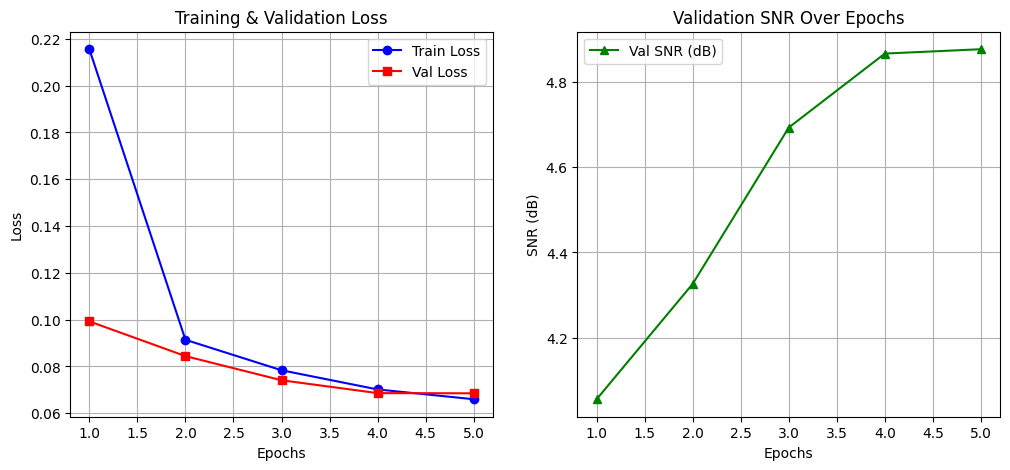


🎯 Trial 3: {'enc_dim': 128, 'feature_dim': 64, 'kernel_size': (5, 5), 'num_layers': 4, 'num_stacks': 3}


❌ OOM in Trial 3. Skipping...

🎯 Trial 4: {'enc_dim': 192, 'feature_dim': 64, 'kernel_size': (3, 3), 'num_layers': 5, 'num_stacks': 2}


❌ OOM in Trial 4. Skipping...


In [ ]:
# ============================
# 🚀 4. Run Trials (Extended)
# ============================
for i, hparams in enumerate(hparam_trials):
    trial_name = hparams["name"]
    print(f"\n🎯 Running {trial_name}: {hparams}")

    model = ConvTasNet(
        enc_dim=hparams["enc_dim"],
        feature_dim=hparams["feature_dim"],
        kernel_size=hparams["kernel_size"],
        num_layers=hparams["num_layers"],
        num_stacks=hparams["num_stacks"]
    )

    # Select optimizer
    if hparams["optimizer"] == "adam":
        optimizer = torch.optim.Adam(model.parameters(), lr=hparams["lr"])
    elif hparams["optimizer"] == "sgd":
        optimizer = torch.optim.SGD(model.parameters(), lr=hparams["lr"], momentum=0.9)
    else:
        raise ValueError(f"Unknown optimizer: {hparams['optimizer']}")

    criterion = nn.MSELoss()
    save_path = f"Models/{trial_name}_ConvTasNet.pth"

    start = time.time()
    try:
        train_eval(
            device,
            model,
            train_loader,
            val_loader,
            optimizer,
            criterion,
            epochs=5,
            accumulation_steps=accum_steps,
            save_pth=save_path,
            pto=False,
            scheduler=hparams["scheduler"]
        )
    except RuntimeError as e:
        if "out of memory" in str(e).lower():
            print(f"❌ OOM in {trial_name}. Skipping...")
            torch.cuda.empty_cache()
            continue
        else:
            raise

    end = time.time()

    # Save trial result
    results.append({
        "trial_name": trial_name,
        **{k: v for k, v in hparams.items() if k != "name"},
        "val_loss": model.best_val_loss if hasattr(model, "best_val_loss") else "NA",
        "time": end - start
    })


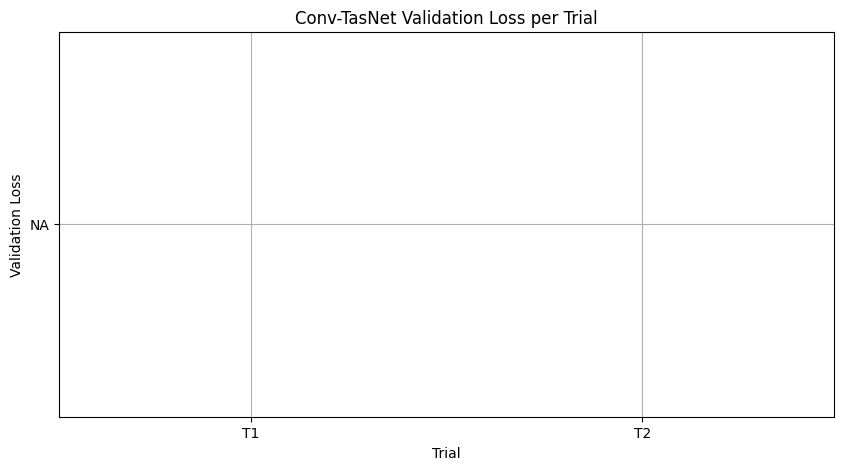

In [ ]:
# ============================
# 📊 5. Save Results & Plot (Updated)
# ============================
results_df = pd.DataFrame(results)
results_df.to_csv("Output/hparam_tuning_results.csv", index=False)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(results_df["trial_name"], results_df["val_loss"])
plt.title("Conv-TasNet Validation Loss per Trial")
plt.xlabel("Trial Name")
plt.ylabel("Validation Loss")
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.savefig("Output/png/hparam_val_loss_plot.png")
plt.show()


In [ ]:
# ============================
# 🧪 6. Evaluate Denoising Performance
# ============================
from Utils.denoise import batch_denoise

# Setup test loader using 28spk set (same val set)
test_loader = val_loader  # reuse for consistency

# Evaluate each saved model
for trial in results_df["trial_name"]:
    model_pth = f"Models/{trial}_ConvTasNet.pth"
    metric_out = f"Output/txt/{trial}_metrics.txt"

    print(f"\n🔍 Evaluating {trial} model...")

    model = ConvTasNet()  # default constructor; weights loaded from file

    batch_denoise(
        device=device,
        model=model,
        model_pth=model_pth,
        classical_method=None,
        test_loader=test_loader,
        sr=sr,
        n_fft=n_fft,
        hop_length=hop_length,
        metric_pth=metric_out,
        pto=False  # change to True if you're using PTO loader
    )


In [ ]:
# 📋 7. Summarise All Metrics
metrics_summary = []

for trial in results_df["trial_name"]:
    metric_pth = f"Output/txt/{trial}_metrics.txt"
    with open(metric_pth, "r") as f:
        lines = f.readlines()
        metric_values = [float(line.strip().split(": ")[1]) for line in lines]
        metrics_summary.append([trial] + metric_values)

metrics_df = pd.DataFrame(
    metrics_summary,
    columns=["Trial", "SNR", "MSE", "LSD", "PESQ", "STOI"]
)

metrics_df.to_csv("Output/final_model_metrics.csv", index=False)
metrics_df
